In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# =========================
# Dataset personalizado
# =========================

class PlacaDataset(Dataset):
    def __init__(self, X_path, Y_path):
        
        self.X = np.load(X_path).astype(np.float32)
        self.Y = np.load(Y_path).astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# =========================
# Definición del modelo
# =========================
class MLPTempRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# =========================
# Configuración
# =========================
X_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/data/dataset_1000_test/X.npy'
Y_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/data/dataset_1000_test/Y.npy'

dataset = PlacaDataset(X_path, Y_path)
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_dim = dataset.X.shape[1]
output_dim = dataset.Y.shape[1]

model = MLPTempRegressor(input_dim, output_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 1000

# =========================
# Entrenamiento
# =========================
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for X_batch, Y_batch in dataloader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    loss_history.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

print("✅ Entrenamiento finalizado.")



Epoch 0, Loss: 7264521.663442
Epoch 10, Loss: 5963983.068824
Epoch 20, Loss: 3101390.424727
Epoch 30, Loss: 2214441.928757
Epoch 40, Loss: 1328091.313244
Epoch 50, Loss: 1390182.663938
Epoch 60, Loss: 4198093.351687
Epoch 70, Loss: 1614939.487103
Epoch 80, Loss: 857635.507937
Epoch 90, Loss: 513713.979601
Epoch 100, Loss: 780600.160838
Epoch 110, Loss: 235050.000868
Epoch 120, Loss: 1352249.813988
Epoch 130, Loss: 981639.719246
Epoch 140, Loss: 824987.001178
Epoch 150, Loss: 771864.248450
Epoch 160, Loss: 1131945.073413
Epoch 170, Loss: 742291.824343
Epoch 180, Loss: 551764.791667
Epoch 190, Loss: 1606342.456783
Epoch 200, Loss: 222222.034660
Epoch 210, Loss: 305898.831566
Epoch 220, Loss: 172864.731585
Epoch 230, Loss: 945726.566127
Epoch 240, Loss: 65740.057850
Epoch 250, Loss: 200247.510045
Epoch 260, Loss: 189764.787388
Epoch 270, Loss: 139819.279576
Epoch 280, Loss: 379971.030909
Epoch 290, Loss: 60000.271794
Epoch 300, Loss: 150064.361669
Epoch 310, Loss: 155817.056114
Epoch 320,

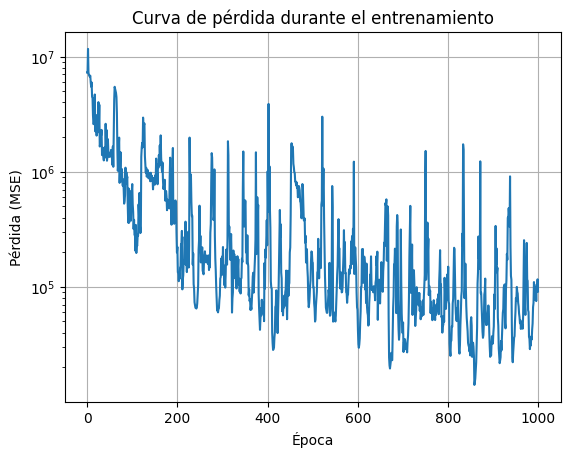

In [4]:
# =========================
# Visualización de la pérdida
# =========================
plt.figure()
plt.semilogy(loss_history)
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.title("Curva de pérdida durante el entrenamiento")
plt.grid()
plt.show()


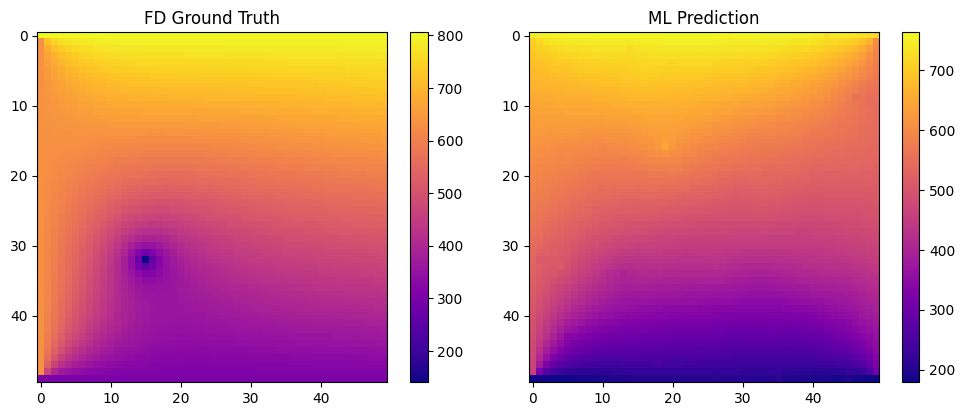

: 

In [ ]:
# =========================
# Evaluación de resultados
# =========================
# Seleccionar una muestra para visualizar
X_sample, Y_true = dataset[265]
X_sample_tensor = torch.tensor(X_sample).unsqueeze(0).to(device)

Y_pred = model(X_sample_tensor).detach().cpu().numpy().reshape(50, 50)  # Ajustar según Nx, Ny

Y_true_reshaped = Y_true.reshape(50, 50)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("FD Ground Truth")
plt.imshow(Y_true_reshaped, cmap='plasma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("ML Prediction")
plt.imshow(Y_pred, cmap='plasma')
plt.colorbar()

plt.tight_layout()
plt.show()

In [6]:
# =========================
# Guardar modelo entrenado
# =========================
model_save_path = 'C:/Users/royer/Documents/ProyectoFinalModelado/results/modelo_temp_ML2.pt'
torch.save(model.state_dict(), model_save_path)
print(f"✅ Modelo guardado en: {model_save_path}")

✅ Modelo guardado en: C:/Users/royer/Documents/ProyectoFinalModelado/results/modelo_temp_ML2.pt
